In [111]:
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [51]:
filename = "cable.csv"
input_data = pd.read_csv(filename, index_col = ['Date']).dropna()

In [52]:
input_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
01/12/2003,1.723811,1.727205,1.718390,1.718597,1.718597,0.0
02/12/2003,1.719010,1.732112,1.717298,1.730313,1.730313,0.0
03/12/2003,1.730493,1.731812,1.725209,1.728101,1.728101,0.0
04/12/2003,1.727414,1.728997,1.718302,1.720697,1.720697,0.0
05/12/2003,1.720608,1.733102,1.719809,1.733102,1.733102,0.0
...,...,...,...,...,...,...
13/01/2023,1.221643,1.224695,1.215185,1.221777,1.221777,0.0
16/01/2023,1.222464,1.228864,1.217434,1.222673,1.222673,0.0
17/01/2023,1.220882,1.229982,1.217063,1.220778,1.220778,0.0


In [57]:
prices = input_data['Close']
((prices - prices.shift(1)) / prices.shift(1)).std()

0.006033537207702337

In [72]:
prices = input_data['Close'].iloc[::2]
print(((prices - prices.shift(1)) / prices.shift(1)).mean() / 2)
print(((prices - prices.shift(1)) / prices.shift(1)).std() / sqrt(2))

-4.818111095598128e-05
0.006067594374693527


In [69]:
prices = input_data['Close'][::5]
((prices - prices.shift(1)) / prices.shift(1)).std() / sqrt(5)

0.006092371929923271

In [71]:
prices = input_data['Close'][1::2]
print(((prices - prices.shift(1)) / prices.shift(1)).mean() / 2)
print(((prices - prices.shift(1)) / prices.shift(1)).std() / sqrt(2))

-5.0059224453784446e-05
0.00611930578615932


In [79]:
prices = input_data['Close']
returns = ((prices - prices.shift(1)) / prices.shift(1))[1:]
scaled_returns = (returns - returns.mean()) / returns.std()

In [103]:
y = scaled_returns.sort_values().values

In [109]:
x = norm.ppf(np.array(range(1,len(scaled_returns)+1)) / len(scaled_returns))

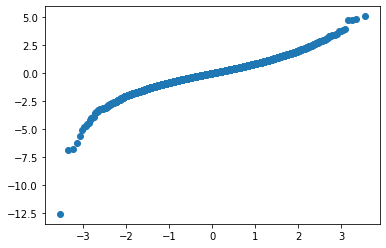

In [110]:
plt.scatter(x,y)
plt.show()

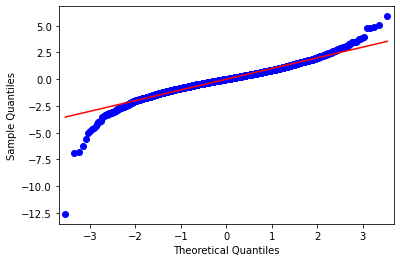

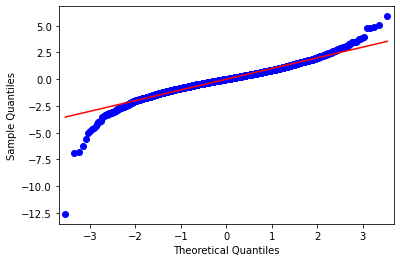

In [113]:
sm.qqplot(y, line='s')